In the project, there is a dataset that provides information about customer satisfaction levels at an unnamed airline. And based on various parameters in this dataset, we aim to develop a machine learning model that predicts whether future customers will be satisfied or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.width',500)

In [4]:
df = pd.read_csv("Airline_customer_satisfaction.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [5]:
print(df.shape)

(129880, 22)


In [6]:
print(df.describe().T)

                                      count         mean          std   min     25%     50%     75%     max
Age                                129880.0    39.427957    15.119360   7.0    27.0    40.0    51.0    85.0
Flight Distance                    129880.0  1981.409055  1027.115606  50.0  1359.0  1925.0  2544.0  6951.0
Seat comfort                       129880.0     2.838597     1.392983   0.0     2.0     3.0     4.0     5.0
Departure/Arrival time convenient  129880.0     2.990645     1.527224   0.0     2.0     3.0     4.0     5.0
Food and drink                     129880.0     2.851994     1.443729   0.0     2.0     3.0     4.0     5.0
Gate location                      129880.0     2.990422     1.305970   0.0     2.0     3.0     4.0     5.0
Inflight wifi service              129880.0     3.249130     1.318818   0.0     2.0     3.0     4.0     5.0
Inflight entertainment             129880.0     3.383477     1.346059   0.0     2.0     4.0     4.0     5.0
Online support              

In [7]:
#Cat Col
cat_col = [col for col in df.columns if str(df[col].dtypes) in ["object"]]
print("Categorical Columns:", cat_col)

#Num Col
num_col = [col for col in df.columns if df[col].nunique() and df[col].dtypes in ["int64","float64"]]
print("Numeric Columns:", num_col)

cat_cols = cat_col + num_col
print("All Columns:", cat_cols)

Categorical Columns: ['satisfaction', 'Customer Type', 'Type of Travel', 'Class']
Numeric Columns: ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
All Columns: ['satisfaction', 'Customer Type', 'Type of Travel', 'Class', 'Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [8]:
# Missing Value
df.isnull().any()

satisfaction                         False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Seat comfort                         False
Departure/Arrival time convenient    False
Food and drink                       False
Gate location                        False
Inflight wifi service                False
Inflight entertainment               False
Online support                       False
Ease of Online booking               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Online boarding                      False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
dtype: bool

In [9]:
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [10]:
for col in num_col:
  if df[col].isnull().any():
    df[col].fillna(df[col].mean(), inplace=True)
print("The gaps were filled with averages.")

The gaps were filled with averages.


In [11]:
# Outlier Analysis
def remove_outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    low = q1 - 1.5 * IQR
    high = q3 + 1.5 * IQR

    # Suppression
    df.loc[df[column] < low, column] = low
    df.loc[df[column] > high, column] = high

    return df

for col in num_col:
    df = remove_outlier(df, col)

print("Outliers Suppressed.")

Outliers Suppressed.


In [12]:
df.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

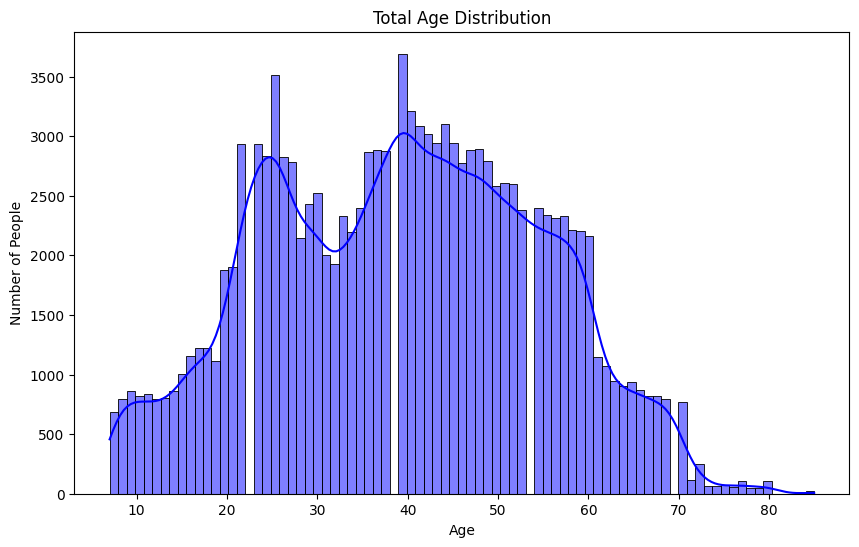

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], kde=True, color="blue")
plt.title("Total Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.show()

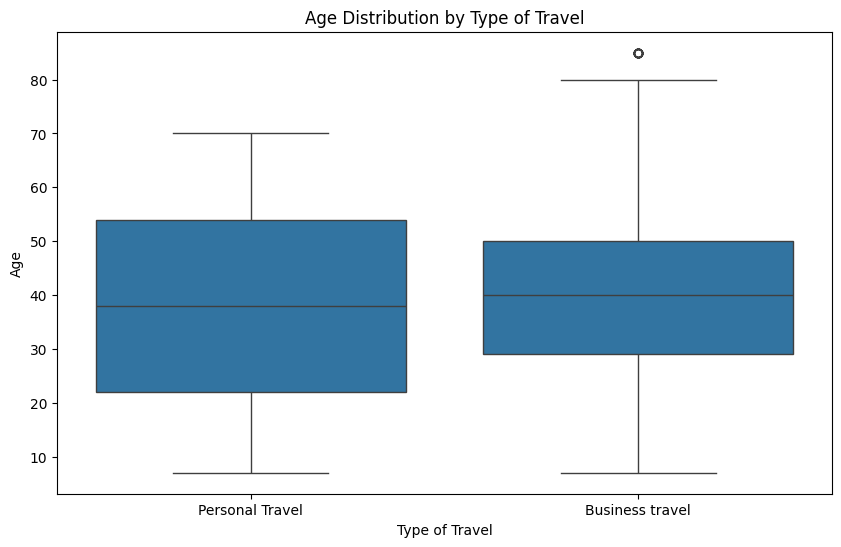

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Type of Travel", y="Age")
plt.title("Age Distribution by Type of Travel")
plt.xlabel("Type of Travel")
plt.ylabel("Age")
plt.show()

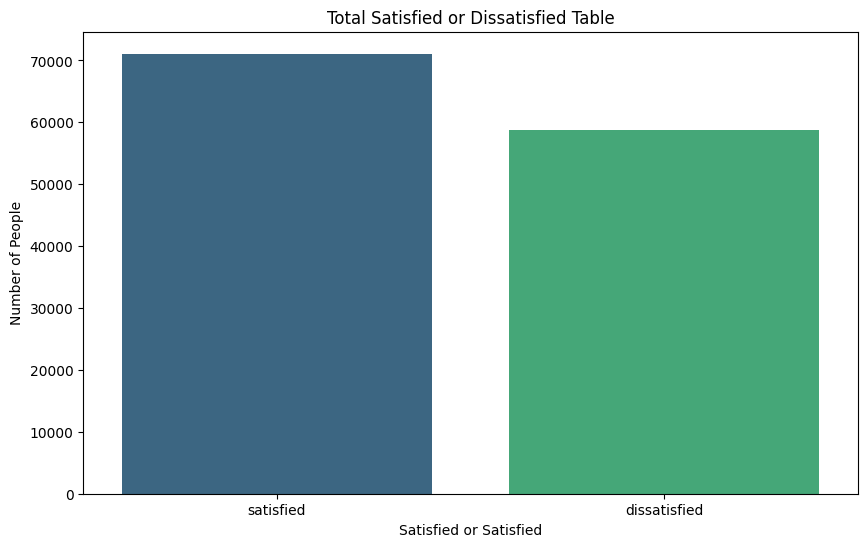

In [23]:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df, x='satisfaction', hue='satisfaction', palette='viridis', legend=False)
  plt.title("Total Satisfied or Dissatisfied Table")
  plt.xlabel("Satisfied or Satisfied")
  plt.ylabel("Number of People")
  plt.show()

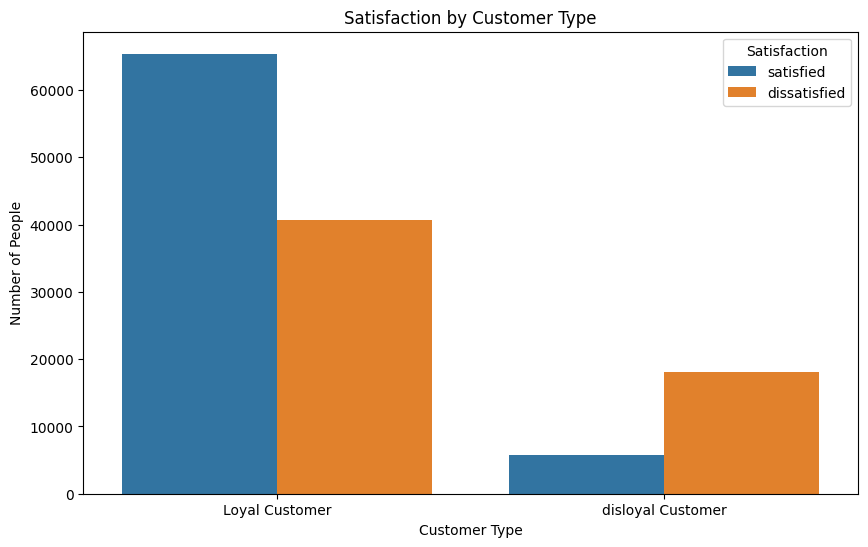

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Customer Type", hue="satisfaction")
plt.title("Satisfaction by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Number of People")
plt.legend(title='Satisfaction')
plt.show()

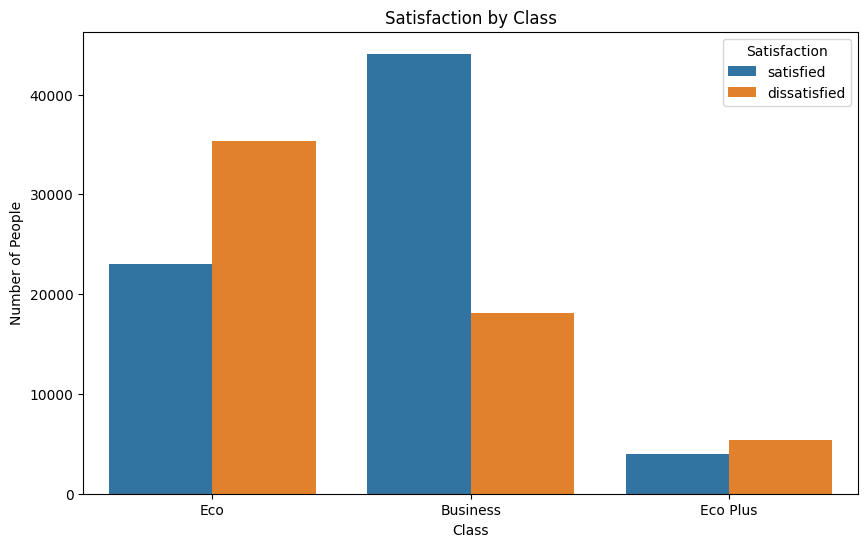

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Class", hue="satisfaction")
plt.title("Satisfaction by Class")
plt.legend(title='Satisfaction')
plt.xlabel("Class")
plt.ylabel("Number of People")
plt.show()

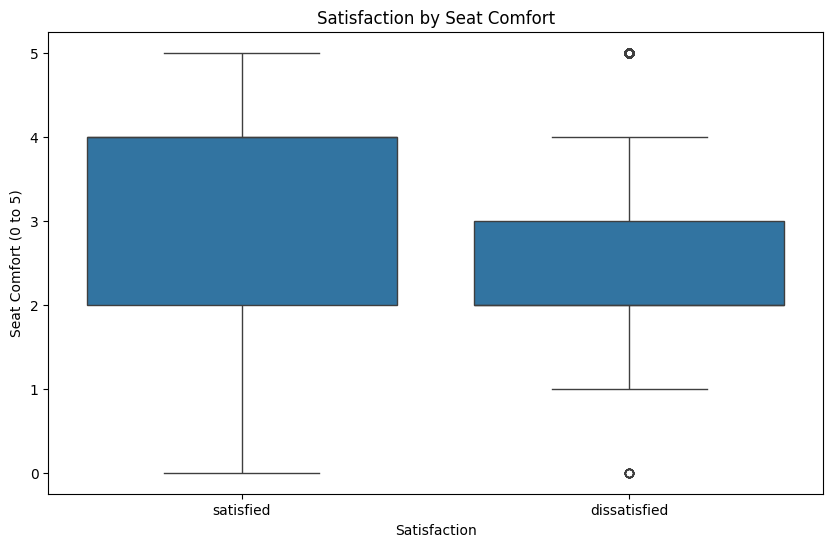

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="satisfaction", y="Seat comfort")
plt.title("Satisfaction by Seat Comfort")
plt.xlabel("Satisfaction")
plt.ylabel("Seat Comfort (0 to 5)")
plt.show()

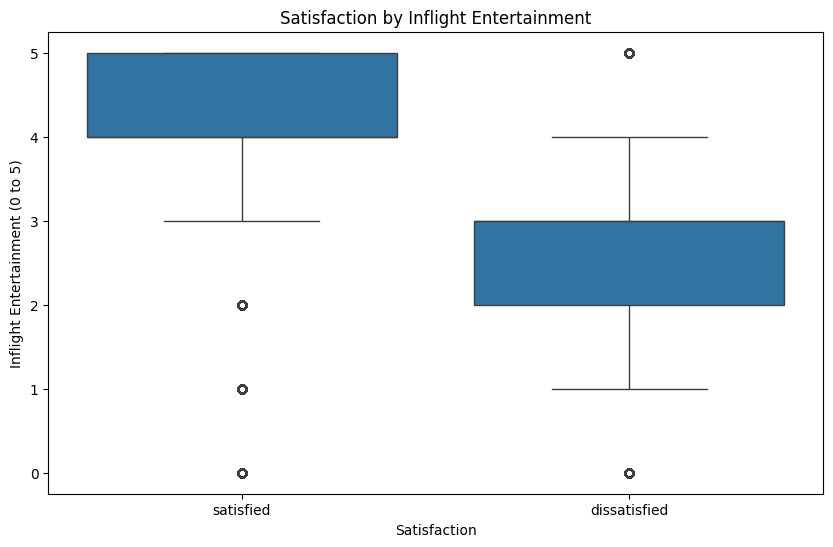

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="satisfaction", y="Inflight entertainment")
plt.title("Satisfaction by Inflight Entertainment")
plt.xlabel("Satisfaction")
plt.ylabel("Inflight Entertainment (0 to 5)")
plt.show()

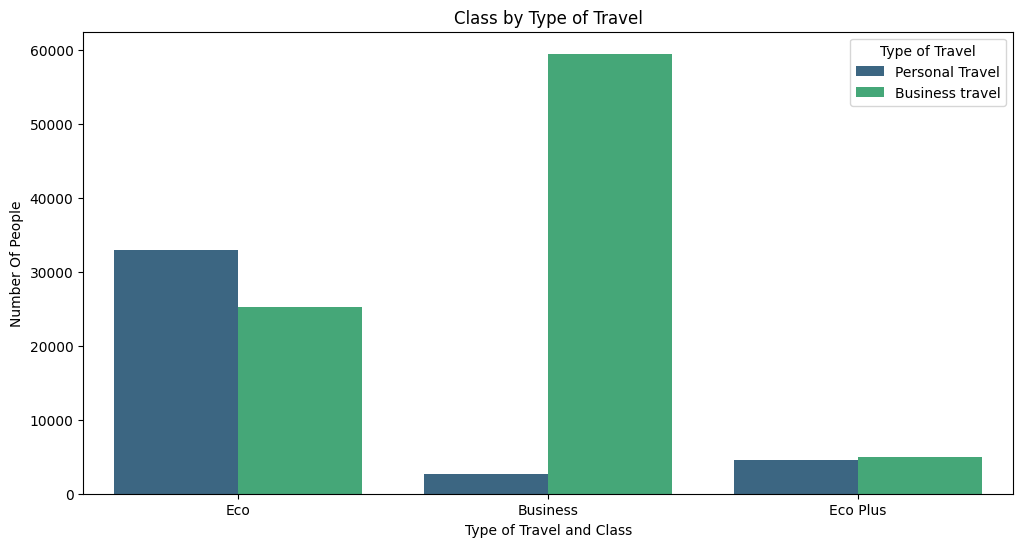

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Class', hue='Type of Travel', palette='viridis')
plt.title('Class by Type of Travel')
plt.xlabel('Type of Travel and Class')
plt.ylabel('Number Of People')
plt.legend(title='Type of Travel')
plt.show()

In [29]:
df["satisfaction"] = df["satisfaction"].map({"satisfied":0,"dissatisfied":1})
df["Customer Type"] = df["Customer Type"].map({"Loyal Customer":0,"disloyal Customer":1})
df["Type of Travel"] = df["Type of Travel"].map({"Personal Travel":0,"Business travel":1})
df["Class"] = df["Class"].map({"Eco":0,"Eco Plus":1,"Business":2})

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Customer Type                      129880 non-null  int64  
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  int64  
 4   Class                              129880 non-null  int64  
 5   Flight Distance                    129880 non-null  float64
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [30]:
# Age grouping
bins = [0, 10, 20, 40, 60, float('inf')]
labels = ['Child', 'Young', 'Young Adult', 'Adult', 'Elderly']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df["Age_Group"] = pd.Categorical(df["Age_Group"], categories=labels, ordered=True)
df["Age_Group"] = df["Age_Group"].cat.codes
df["Age_Group"] = df["Age_Group"].astype('int64')

In [31]:
# Service Total
service_columns = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
                   'Gate location', 'Inflight wifi service', 'Inflight entertainment',
                   'Online support', 'Ease of Online booking', 'On-board service',
                   'Leg room service', 'Baggage handling', 'Checkin service',
                   'Cleanliness', 'Online boarding']
df['Service_Total'] = df[service_columns].mean(axis=1)

In [32]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Customer Type                      129880 non-null  int64  
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  int64  
 4   Class                              129880 non-null  int64  
 5   Flight Distance                    129880 non-null  float64
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [33]:
X = df.drop('satisfaction', axis=1).dropna()
y = df.loc[X.index, 'satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LogisticRegression(random_state=42, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [35]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Skoru: {accuracy}")

Doğruluk Skoru: 0.8276485987064983


In [36]:
print(model.feature_names_in_)

['Customer Type' 'Age' 'Type of Travel' 'Class' 'Flight Distance'
 'Seat comfort' 'Departure/Arrival time convenient' 'Food and drink'
 'Gate location' 'Inflight wifi service' 'Inflight entertainment'
 'Online support' 'Ease of Online booking' 'On-board service'
 'Leg room service' 'Baggage handling' 'Checkin service' 'Cleanliness'
 'Online boarding' 'Departure Delay in Minutes' 'Arrival Delay in Minutes'
 'Age_Group' 'Service_Total']


In [37]:
new_data = pd.DataFrame({
    'Customer Type': [2],
    'Age': [50],
    'Type of Travel': [2],
    'Class': [2],
    'Flight Distance': [1500],
    'Seat comfort': [3],
    'Departure/Arrival time convenient': [4],
    'Food and drink': [4],
    'Gate location': [4],
    'Inflight wifi service': [4],
    'Inflight entertainment': [4],
    'Online support': [4],
    'Ease of Online booking': [34],
    'On-board service': [3],
    'Leg room service': [3],
    'Baggage handling': [3],
    'Checkin service': [5],
    'Cleanliness': [5],
    'Online boarding': [3],
    'Departure Delay in Minutes': [10],
    'Arrival Delay in Minutes': [5],
    'Age_Group': [3],
    'Service_Total': [4]
})

new_data = new_data[model.feature_names_in_]

In [38]:
new_pred = model.predict(new_data)

pred = 'Satisfied' if new_pred[0] == 0 else 'Dissatisfied'

print(f"Pred: {pred}")

Pred: Satisfied
